# ReLU
---

# Perceptrón Multicapa
---

Clase MLPClassifier de Sckit-Learn:
    
    - El parámetro "hidden_layer_sizes": sirve para indicar el número de nueronas artificiales en cada capa oculta.
        · (2,): una única capa oculta con 2 neuronas.
        · (5, 3) dos capas oculatas con 5 y 3 neuronas atifiaciales respectivamente
        · (6, 3, 5) .....
        
    - "MlpClassifier" de Scikit-Learn crea en la capa de salida tantas neuronas como clases existan, excepto si se trara de clasicicación binaria.

---

In [1]:
import pandas as pd

### Supongamos que tenemos el siguiente dataframe

In [5]:
df = pd.DataFrame({
    "x0": [0.4, 0.2, 0.5, 0.6],
    "x1": [0.6, 0.1, 0.2, 0.7],
    "y": [  1,   0,   0,   1]
})

In [6]:
# Vamos a considerar categórica la variable objetivo "y"
# para trabajar en un escenario de clasificación
y_train = df.pop("y")
df

,x0,x1
0,0.4,0.6
1,0.2,0.1
2,0.5,0.2
3,0.6,0.7


In [10]:
# IMPORTANTE, Hemos quitado la "y" (varable objetivo)
X_train = df

In [7]:
# Importamos ahora la clase MLPClassifier e instanciamos el algoritmo
from sklearn.neural_network import MLPClassifier

### Vamos a crear un modelo con una tasa de aprendizaje de 0.1, especifacando como función de activación de lasd capas ocultas la función Rectified Linear Unified

In [8]:
model = MLPClassifier(
    (2, ),
    random_state = 0,
    learning_rate_init = 0.1,
    activation = "relu"
)

In [11]:
# Entrenamos el modelo
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(2,), learning_rate_init=0.1, random_state=0)

In [12]:
model.intercepts_
# Nos devuelve un array por cada capa, con los "bias"
# [b0, b1]
# [b2]

[array([-0.75113716, -0.78165981]), array([-0.2638654])]

In [13]:
model.coefs_
# nos devuelve un array por cadad capa, con los pesos 
# [w00, w01], [w10, w11]
# [w20, w21]

[array([[-0.4320317 , -0.6241389 ],
        [-0.30745678, -0.46121447]]),
 array([[0.36319675],
        [0.15671958]])]

---
# Ejercicio Redes Neuronales
---

    - Cargar el dataset Iris de "seaborn".
    - Coger las variables predictoras "sepal_lentgh" y "sepal_width".
    - Coger "species" codificado como variable objetivo.
    - Escalar las variables de entrada con "StandardScales".
    - Crear los datasets de entrenamiento y validación.
    - Instanciar el modelo con MlpClassifier (max_iter = 1000).
    - Comprobar el porcentaje de aciertos en el dataset de validación.
    - Visualizar las fronteras de decisión.
    - Repetir el proceso hasta obtener el nuevo score, usando las 4 variables predictoras del dataset Iris.

In [65]:
# Importamos librerías
import pandas as pd
import seaborn as sb
import fronteras as fr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import fronteras as fr

In [66]:
df = sb.load_dataset("iris")
df.sample(5, random_state = 0)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


In [67]:
df["label"] = df.species.astype("category").cat.codes # Vamos a crear la columna "label"
df.sample(5, random_state = 0)

,sepal_length,sepal_width,petal_length,petal_width,species,label
114,5.8,2.8,5.1,2.4,virginica,2
62,6.0,2.2,4.0,1.0,versicolor,1
33,5.5,4.2,1.4,0.2,setosa,0
107,7.3,2.9,6.3,1.8,virginica,2
7,5.0,3.4,1.5,0.2,setosa,0


In [68]:
df.shape

(150, 6)

In [69]:
df = df[df.species.isin(["setosa", "versicolor", "virginica"])]

In [70]:
X = df[["sepal_length", "sepal_width"]]
y = df["label"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 0) # STRATFY te coje las muestras de manera equitativa

In [72]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train) # Fija los parametros del transformador
X_test_std = scaler.transform(X_test) # Esta función lo utiliza

In [73]:
model = MLPClassifier(
    max_iter = 1000
)

In [74]:
# Entrenamos el modelo
model.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [75]:
score = model.score(X.values, y.values)
print(model.n_iter_)
print(score)

650
0.8266666666666667


C:\Users\72478072N\AppData\Local\anaconda3\envs\CursoIA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


C:\Users\72478072N\AppData\Local\anaconda3\envs\CursoIA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


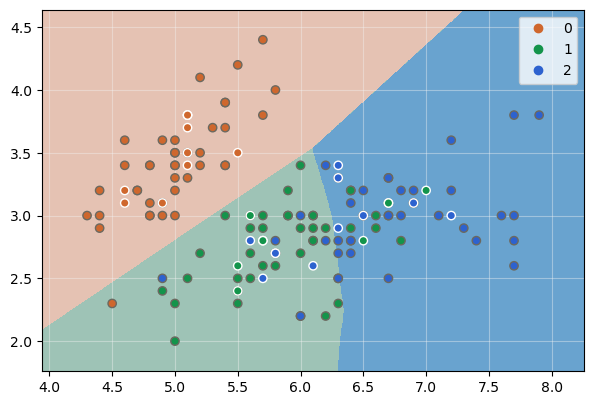

In [76]:
fr.mostrar_fronteras(model, X_train.values, X_test.values, y_train, y_test, df.label.unique())

---

In [77]:
df = sb.load_dataset("iris")
df.sample(5, random_state = 0)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


In [78]:
df["label"] = df.species.astype("category").cat.codes # Vamos a crear la columna "label"
df.sample(5, random_state = 0)

,sepal_length,sepal_width,petal_length,petal_width,species,label
114,5.8,2.8,5.1,2.4,virginica,2
62,6.0,2.2,4.0,1.0,versicolor,1
33,5.5,4.2,1.4,0.2,setosa,0
107,7.3,2.9,6.3,1.8,virginica,2
7,5.0,3.4,1.5,0.2,setosa,0


In [79]:
X2 = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y2 = df["label"]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, stratify = y, test_size = 0.2, random_state = 0) # STRATFY te coje las muestras de manera equitativa

In [81]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train) # Fija los parametros del transformador
X_test_std = scaler.transform(X_test) # Esta función lo utiliza

In [82]:
model = MLPClassifier(
    max_iter = 1000
)

In [83]:
# Entrenamos el modelo
model.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [84]:
score = model.score(X.values, y.values)
print(model.n_iter_)
print(score)

C:\Users\72478072N\AppData\Local\anaconda3\envs\CursoIA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but MLPClassifier is expecting 4 features as input.

C:\Users\72478072N\AppData\Local\anaconda3\envs\CursoIA\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but MLPClassifier is expecting 4 features as input.

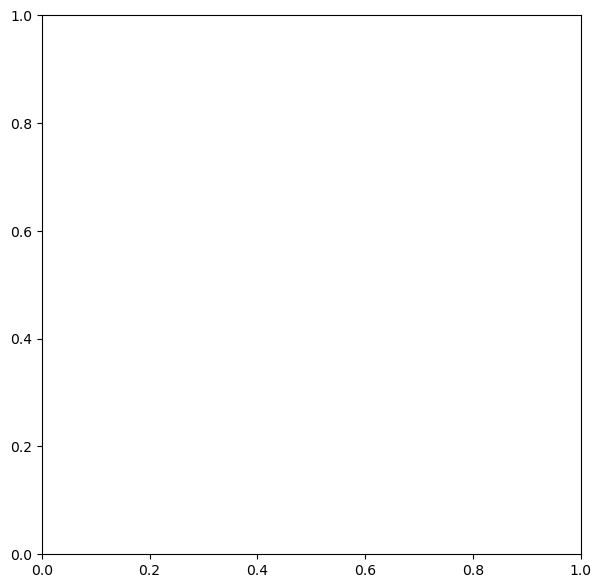

In [59]:
fr.mostrar_fronteras(model, X_train.values, X_test.values, y_train, y_test, df.label.unique())

---
# Solución

In [107]:
# Importamos librerías
import pandas as pd
import seaborn as sb
import fronteras as fr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import fronteras as fr

In [108]:
df = sb.load_dataset("iris")
df["label"] = df.species.astype("category").cat.codes # Vamos a crear la columna "label"

In [109]:
X = df[["sepal_length", "sepal_width"]]
y = df["label"]

In [111]:
scaler = StandardScaler()
X = scaler.fit_transform(X) # Fija los parametros del transformador

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 0) # STRATFY te coje las muestras de manera equitativa

In [103]:
model = MLPClassifier(
    max_iter = 1000
)
model.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [104]:
model.score(X_test, y_test)

0.7333333333333333

In [106]:
fr.mostrar_fronteras(model, X_train.values, X_test.values, y_train, y_test, df.species.unique())

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
X = df.drop([])